In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
font = {'size'   : 16,
        'family': 'serif'}

mpl.rc('font', **font)
sns.set_style("whitegrid")

In [3]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [4]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv
df_res["est_type"] = df_res["est_type"].replace({"RAND": "R", "FF": "F", "ZERO": "Z", "LSTM": "L"})

In [5]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [6]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

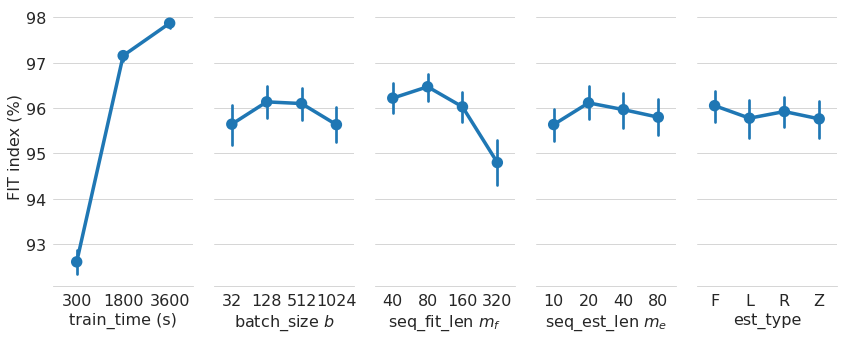

In [7]:
# Full results: main effects
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["train_time (s)",
                "batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]

#fig, ax = pyplot.subplots(figsize=(10,10))
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index (%)")
g.fig.set_size_inches(12, 5)
plt.tight_layout()
plt.savefig("wh_main_effects.pdf")
# Biggest effect seems to be max_time

In [8]:
#df_res["max_time"]

In [9]:
#sns.pairplot(df_res, x_vars=["max_time", "batch_size", "seq_len", "seq_est_len"],
#             y_vars=["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"], hue="FIT")

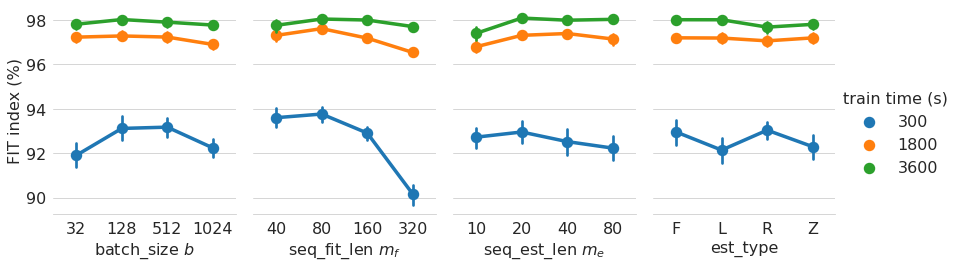

In [10]:
# Full results: main effects
factors = ["batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 hue="max_time",
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index (%)")
g.fig.set_size_inches(12, 4)
plt.tight_layout()
g.add_legend(title = "train time (s)")
plt.savefig("wh_train_time_interactions.pdf")
# Biggest effect seems to be max_time

In [11]:
df_short_est = pd.DataFrame(df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 3600)])

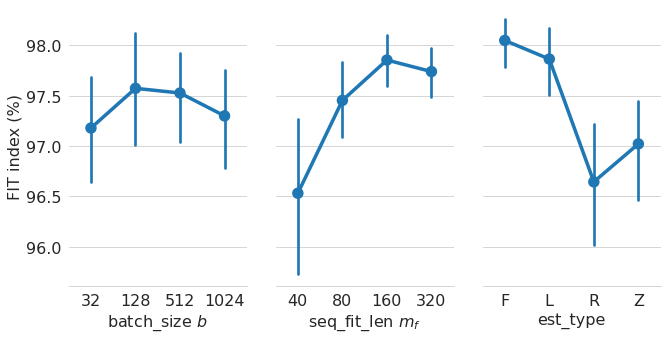

In [12]:
# Full results: main effects
factors = ["batch_size", "seq_len", "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "est_type"]
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=["batch_size", "seq_len", "est_type"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index (%)")
plt.tight_layout()
g.fig.set_size_inches(10,5)
#plt.savefig("wh_main_effects_restricted.pdf")
# Biggest effect seems to be max_time

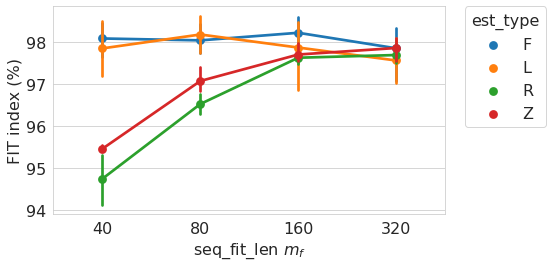

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot(x="seq_len", y=response, hue="est_type", data=df_short_est, ax=ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("wh_est_type_interactions_restricted.pdf")

In [14]:
df_short_seq = pd.DataFrame(df_res[(df_res["seq_len"] == 40) & (df_res["max_time"] == 3600)])

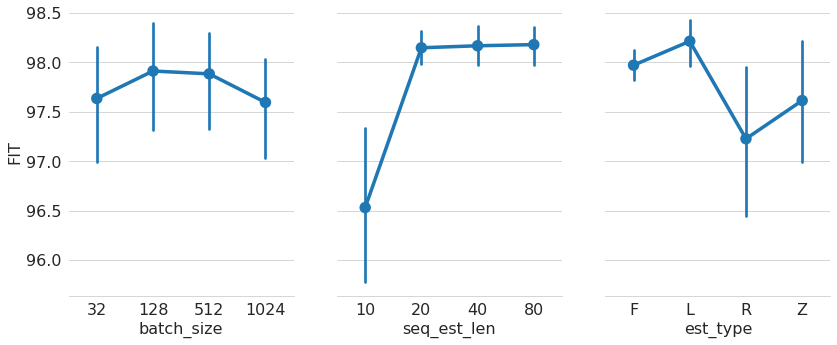

In [15]:
# Full results: main effects
factors = ["batch_size", "seq_est_len", "est_type"]
factor_names = ["batch_size $b$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_short_seq, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.8)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
plt.savefig("wh_main_effects_restricted.pdf")

In [16]:
df_short_seq["est_type"] = df_short_seq["est_type"].replace({"R": "RAND", "F": "FF", "Z": "ZERO", "L": "LSTM"})

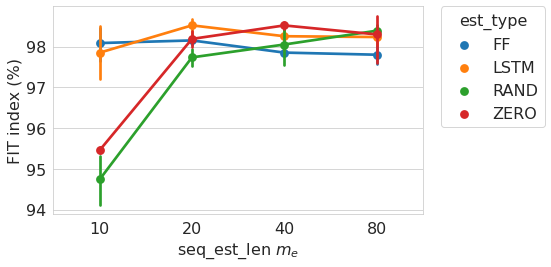

In [17]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot(x="seq_est_len", y=response, hue="est_type", data=df_short_seq);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$");
g.yaxis.set_label_text("FIT index (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("wh_est_type_interactions_restricted.pdf")

In [18]:
#sns.scatterplot(data=df_res, x="seq_len", y="seq_est_len", hue="FIT")

In [19]:
#x.scatter(df_res, x="seq_len", y="seq_est_len", color="FIT")

In [26]:
df_short_seq[df_short_seq["seq_est_len"]==10]

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
180,5,0.001,10000,3600,128,40,10,forward,LSTM,15,103,98.602142,3.342936
717,197,0.001,10000,3600,128,40,10,forward,FF,15,144,98.506874,3.570766
677,200,0.001,10000,3600,512,40,10,forward,FF,15,609,98.407684,3.807976
418,8,0.001,10000,3600,512,40,10,forward,LSTM,15,395,98.402679,3.819947
497,194,0.001,10000,3600,32,40,10,forward,FF,15,564,98.021172,4.732308
458,203,0.001,10000,3600,1024,40,10,forward,FF,15,473,97.404121,6.207970
222,2,0.001,10000,3600,32,40,10,forward,LSTM,15,113,97.244377,6.589994
608,11,0.001,10000,3600,1024,40,10,forward,LSTM,15,546,97.145874,6.825570
590,395,0.001,10000,3600,1024,40,10,forward,ZERO,15,60,95.573883,10.584936
30,584,0.001,10000,3600,512,40,10,forward,RAND,15,24,95.541473,10.662454
